# 算術平均

In [1]:
import numpy as np
apple_weights = [295, 300, 300, 310, 311]
np.mean(apple_weights)

303.2

# 幾何平均

In [2]:
from scipy import stats
salary_growth = [1.05, 1.1, 1.3]
salary_growth_mean = stats.gmean(salary_growth)
salary_growth_mean

1.1450956868476592

# 調和平均

In [3]:
velocities = [20, 60]
velocities_mean = stats.hmean(velocities)
velocities_mean

30.0

# 中央値

In [4]:
import time 

randoms = np.random.randn(10**7)

before_mean = time.time()
mean = np.mean(randoms)
after_mean = time.time()
print('mean is {} (it takes {:.2f}s) '.format(mean, after_mean-before_mean))

before_median = time.time()
median = np.median(randoms)
after_median = time.time()
print('median is {} (it takes {:.2f}s) '.format(median, after_median-before_median))

mean is 1.3824768748921727e-05 (it takes 0.00s) 
median is -0.0002301606144713392 (it takes 0.15s) 


# 最頻値

In [5]:
from scipy import stats
mode, count = stats.mode([6, 2, 4, 5, 1, 3, 5, 3, 4])

In [6]:
mode

array([3])

In [7]:
count

array([2])

# 四分位数

IQR:22.0
QD:11.0


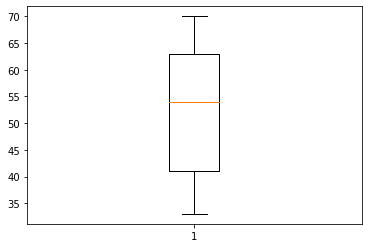

In [8]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

data = [33, 35, 36, 39, 43, 49, 51, 54, 54, 56, 62, 64, 64, 69, 70]

iqr = stats.iqr(data)
qd = iqr/2

print('IQR:{}'.format(iqr))
print('QD:{}'.format(qd))

plt.boxplot(data)
plt.show()

# 分散・標準偏差

In [9]:
import numpy as np

def get_variance(samples):
    mean = np.mean(samples)
    deviations = samples - mean
    squared_deviations = deviations * deviations
    sum_squared_deviations = np.sum(squared_deviations)
    variance = sum_squared_deviations / len(samples)
    return variance

samples = [10, 10, 11, 14, 15, 15, 16, 18, 18, 19, 20]
print(get_variance(samples))
print(np.var(samples))

11.537190082644628
11.537190082644628


In [10]:
print(np.sqrt(get_variance(samples)))
print(np.std(samples))

3.3966439440489826
3.3966439440489826


Scipy, pandasは不偏分散

In [11]:
from scipy import stats
print(stats.tvar(samples))
print(stats.tstd(samples))

import pandas as pd
df = pd.DataFrame({'sample':samples})
print(df['sample'].var())
print(df['sample'].std())

12.690909090909091
3.562430222602134
12.690909090909093
3.5624302226021345


# 不偏分散

/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-4.607601228172533, 4.857283569028591, 0.0, 0.41253871213321336)

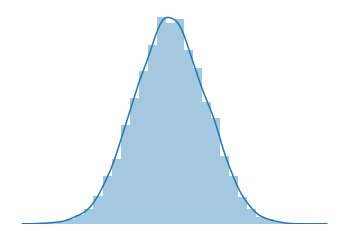

In [12]:
import seaborn as sns 
sns.distplot(np.random.randn(int(1e4)), bins=30)
plt.axis('off')

In [13]:
import numpy as np
population = np.array([1, 5, 10, 11, 14, 15, 15, 16, 18, 18, 19, 20, 25, 30])
# ランダムに値を抽出
samples = np.random.choice(population, size=5)
print('population mean is {}'.format(np.mean(population)))
print('sample mean is {}'.format(np.mean(samples)))
print('samples: {}'.format(samples))

population mean is 15.5
sample mean is 12.6
samples: [10 19 14 15  5]


In [14]:
print('population mean is {}'.format(np.mean(population)))
sample_mean_list = []
count = 10000
for i in range(count):
    samples = np.random.choice(population, size=5)
    sample_mean_list.append(np.mean(samples))
print('sample_mean_list mean is {}'.format(np.mean(sample_mean_list)))

population mean is 15.5
sample_mean_list mean is 15.499979999999999


# 散らばり具合

In [15]:
randoms = np.random.rand(1000)
mean = np.mean(randoms)
std = np.std(randoms)

count = 0
coef = 1
thresh = coef * std

for num in randoms:
    if num > mean - thresh and num < mean + thresh:
        count += 1
        
print('{}% of the numbers are included within mean±{}std'.format(int(count/len(randoms)*100), coef))

58% of the numbers are included within mean±1std


/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


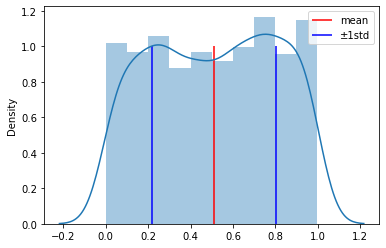

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(randoms)
plt.vlines(mean, 0, 1, 'r', label='mean')
plt.vlines(mean+coef*std, 0, 1, 'b', label='±{}std'.format(coef))
plt.vlines(mean-coef*std, 0, 1, 'b')
plt.legend()

# 標準化

In [17]:
data = [0, 10, 20, 25, 27, 30, 43, 56, 68, 70]

mean = np.mean(data)
std = np.std(data)

z = (data - mean)/std

print('standardized data(z): {}'.format(z))
print('mean: {:.2f}'.format(np.mean(z)))
print('std: {}'.format(np.std(z)))

standardized data(z): [-1.54799532 -1.10444365 -0.66089199 -0.43911615 -0.35040582 -0.21734032
  0.35927685  0.93589402  1.46815602  1.55686636]
mean: 0.00
std: 1.0


In [18]:
from sklearn.preprocessing import StandardScaler
data = np.array([0, 10, 20, 25, 27, 30, 43, 56, 68, 70])
print('data shape:{}'.format(data.shape))
data = np.expand_dims(data, axis=-1)
print('reshaped data shape:{}'.format(data.shape))

scaler = StandardScaler()
scaled = scaler.fit_transform(data)
print(scaled)

data shape:(10,)
reshaped data shape:(10, 1)
[[-1.54799532]
 [-1.10444365]
 [-0.66089199]
 [-0.43911615]
 [-0.35040582]
 [-0.21734032]
 [ 0.35927685]
 [ 0.93589402]
 [ 1.46815602]
 [ 1.55686636]]


# t-score(偏差値)

/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


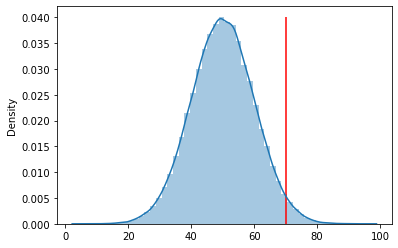

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

samples = np.random.randn(100000)
tscore = samples*10 + 50
sns.distplot(tscore)
plt.vlines(70, 0,0.04, 'r')

# 共分散

/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


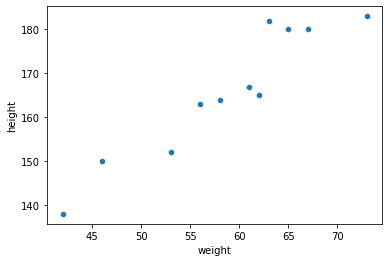

In [20]:
weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])
sns.scatterplot(weight, height)
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [21]:
np.cov(weight, height)

array([[ 82.81818182, 127.54545455],
       [127.54545455, 218.76363636]])

In [22]:
import pandas as pd
df = pd.DataFrame({'weight':weight, 'height':height})
df

,weight,height
0,42,138
1,46,150
2,53,152
3,56,163
4,58,164
5,61,167
6,62,165
7,63,182
8,65,180
9,67,180


In [23]:
df.cov()

,weight,height
weight,82.818182,127.545455
height,127.545455,218.763636


# 相関係数

In [24]:
import numpy as np
weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])

r = np.corrcoef(weight, height)
r

array([[1.        , 0.94757714],
       [0.94757714, 1.        ]])

In [25]:
df = pd.DataFrame({'weight':weight, 'height':height})
df.corr()

,weight,height
weight,1.000000,0.947577
height,0.947577,1.000000


<AxesSubplot:>

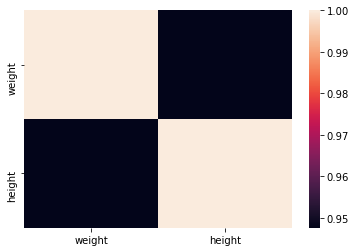

In [26]:
import seaborn as sns
sns.heatmap(df.corr())

In [27]:
def generate_values(r=0.5, num=1000):
    
    a = np.random.randn(num)
    e1 = np.random.randn(num)
    e2 = np.random.randn(num)
    
    if r<0:
        r = -r
        x = - np.sqrt(r)*a - np.sqrt(1-r)*e1
    else:
        x = np.sqrt(r) * a + np.sqrt(1-r)*e1
    y = np.sqrt(r) * a + np.sqrt(1-r)*e2
    
    actual_r = np.corrcoef(x,y)[0][1]
    
    return x, y, actual_r

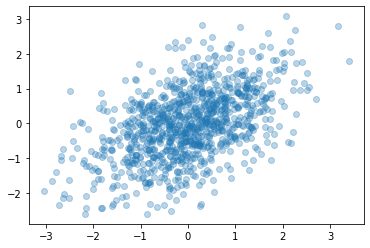

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

x, y, actual_r = generate_values()
plt.scatter(x, y, alpha=0.3)

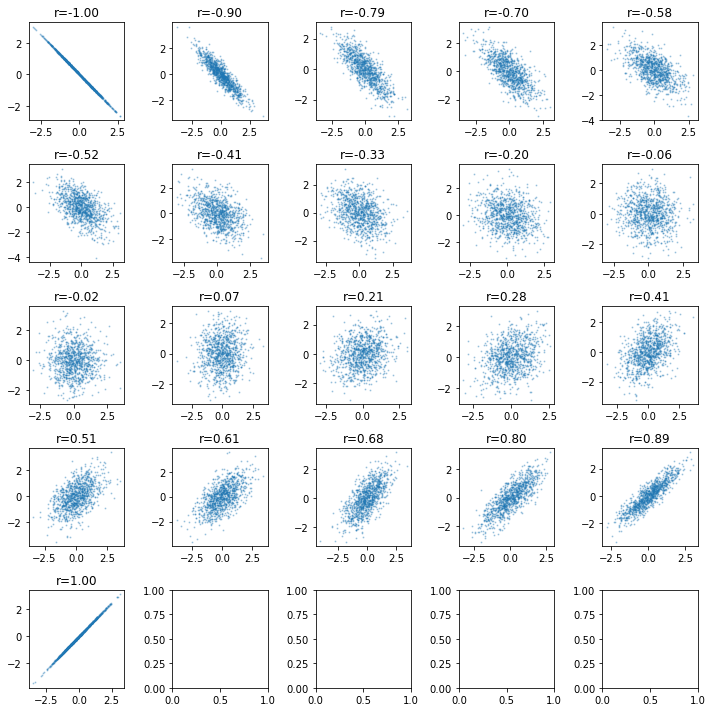

In [29]:
rows = 5
cols = 5
figsize=(10, 10)
fig, ax = plt.subplots(rows, cols, figsize=figsize)
for idx, r in enumerate(np.arange(-1, 1.1, 0.1)):
    row_i = idx // cols
    col_i = idx % cols
    x, y, actual_r = generate_values(r=r)
    title = 'r={:.2f}'.format(actual_r)
    ax[row_i, col_i].set_title(title)
    ax[row_i, col_i].scatter(x, y, alpha=0.3, s=1)
fig.tight_layout()

r=0.95 (before adding outlier)
r=-0.09 (after adding outlier)


Text(0, 0.5, 'height')

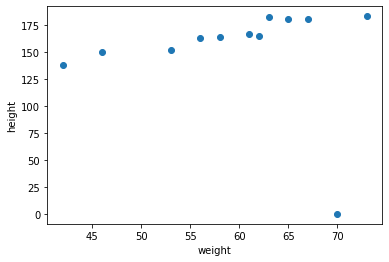

In [30]:
import numpy as np
weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])

#外れ値追加前
r = np.corrcoef(weight, height)[0][1]
print('r={:.2f} (before adding outlier)'.format(r))

#外れ値追加
weight = np.append(weight, 70)
height = np.append(height, 0)
r = np.corrcoef(weight, height)[0][1]
print('r={:.2f} (after adding outlier)'.format(r))

plt.scatter(weight, height)
plt.xlabel('weight')
plt.ylabel('height')

# 回帰直線

/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

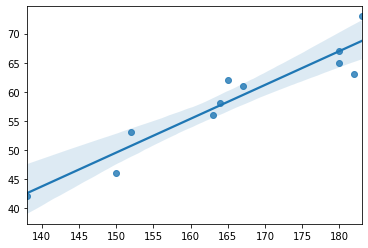

In [31]:
 
weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])
sns.regplot(height, weight)

Text(0, 0.5, 'weight')

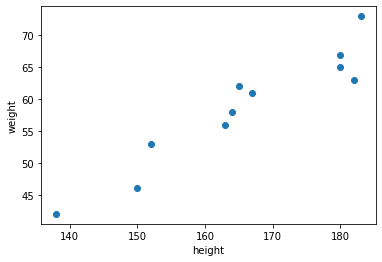

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])
plt.scatter(height, weight)
plt.xlabel('height')
plt.ylabel('weight')

Text(0, 0.5, 'weight')

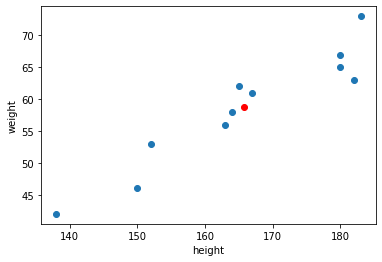

In [33]:
plt.scatter(height, weight)
plt.plot(np.mean(height), np.mean(weight), 'ro')
plt.xlabel('height')
plt.ylabel('weight')

/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'weight')

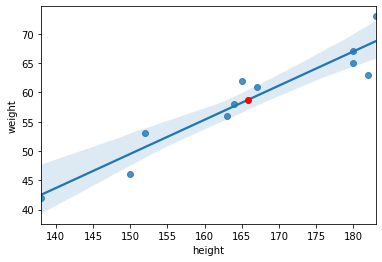

In [34]:
sns.regplot(height, weight)
plt.plot(np.mean(height), np.mean(weight), 'ro')
plt.xlabel('height')
plt.ylabel('weight')

In [35]:
from sklearn.linear_model import LinearRegression

X = np.expand_dims(height, axis=-1)
y = weight
reg = LinearRegression()
reg.fit(X, y)

print('y={}+{}x'.format(reg.intercept_, reg.coef_))

y=-37.94946808510635+[0.58302859]x


In [36]:
#標準偏差
s_x = np.std(height)
s_y = np.std(weight)
#平均
mean_x = np.mean(height)
mean_y = np.mean(weight)
#相関係数
r = np.corrcoef(weight, height)[0][1]

b = r * s_y/s_x
a = mean_y - b*mean_x
print("b={}".format(b))
print("a={}".format(a))

b=0.5830285904255318
a=-37.94946808510635


In [37]:
X = np.array([[175]])
y = reg.predict(X)
print(X, y)

[[175]] [64.08053524]


# 2通りの回帰直線

Text(0, 0.5, 'weight')

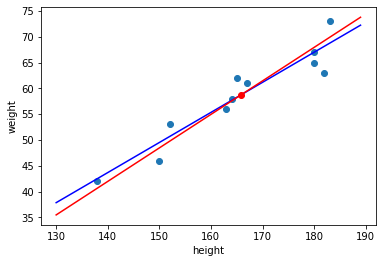

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])

# height ---> weight
X = np.expand_dims(height, axis=-1)
y = weight
reg1 = LinearRegression()
reg1.fit(X, y)

# weight ---> height
X = np.expand_dims(weight, axis=-1)
y = height
reg2 = LinearRegression()
reg2.fit(X, y)

x = np.arange(130, 190, 1)
plt.scatter(height, weight)
plt.plot(x, x*reg1.coef_ + reg1.intercept_, 'b')
plt.plot(x, (x-reg2.intercept_)/reg2.coef_, 'r')
plt.plot(np.mean(height), np.mean(weight), 'ro')
plt.xlabel('height')
plt.ylabel('weight')

# 決定係数

In [39]:
from sklearn.linear_model import LinearRegression

weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])

X = np.expand_dims(height, axis=1)
y = weight

reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
weight_test = np.array([43, 45, 50, 58, 58, 60, 66, 63, 65, 70, 72])
height_test = np.array([140, 148, 152, 163, 160, 170, 163, 177, 177, 185, 180])

X_test = np.expand_dims(height_test, axis=-1)
y_test_pred = reg.predict(X_test)

In [41]:
from sklearn.metrics import r2_score
r2_score(weight_test, y_test_pred)

0.8586682113144612

# 二項分布

In [42]:
from scipy.stats import binom
data_binom = binom.rvs(n=3, p=1/6, size=2160)

In [43]:
data_binom

array([2, 0, 0, ..., 1, 2, 0])

/Users/yuto/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

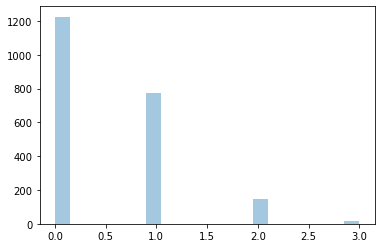

In [44]:
sns.distplot(data_binom, kde=False)

<AxesSubplot:ylabel='Density'>

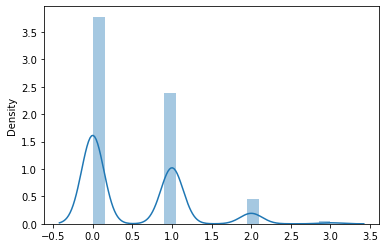

In [45]:
sns.distplot(data_binom)

# ポアソン分布

In [46]:
from scipy.stats import poisson
import math
import numpy as np

mu = 30
k = 40

p = poisson.pmf(k=k, mu=mu)

print(p)

0.013943463479967897


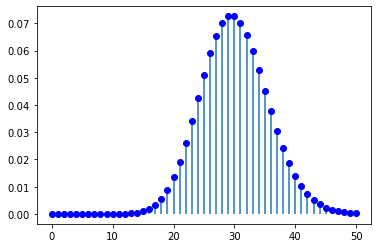

In [47]:
x = np.arange(51)
plt.plot(x, poisson.pmf(k=x, mu=mu), 'bo')
plt.vlines(x, 0, poisson.pmf(k=x, mu=mu))

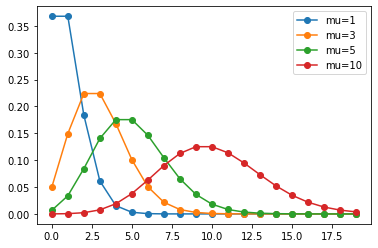

In [48]:
x = np.arange(20)
mu_list = [1, 3, 5, 10]
for idx, mu in enumerate(mu_list):
    plt.plot(x, poisson.pmf(k=x, mu=mu), 'o-', label='mu={}'.format(mu))
plt.legend()

# 幾何分布

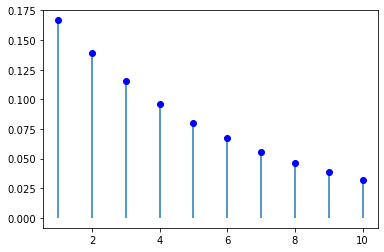

In [49]:
from scipy.stats import geom

x = np.arange(1, 11)
y = geom.pmf(k=x, p=1/6)
plt.plot(x, y, 'bo')
plt.vlines(x, 0, y)

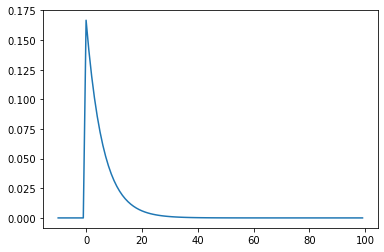

In [50]:
from scipy.stats import expon

x = np.arange(-10, 100)
y = expon.pdf(x=x, scale=6)
plt.plot(x, y)

# 正規分布

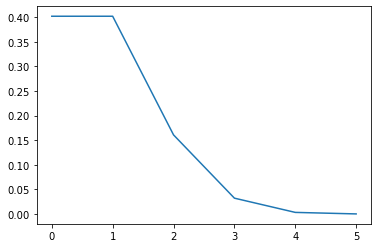

In [51]:
from scipy.stats import binom

n = 5
p = 1/6
x = np.arange(n + 1)
y = binom.pmf(k=x, p=p, n=n)
plt.plot(x, y)

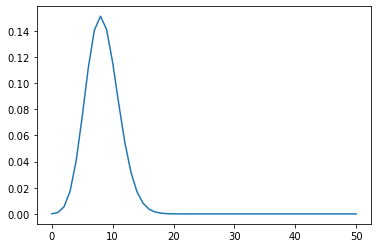

In [52]:
n = 50
p = 1/6
x = np.arange(n + 1)
y = binom.pmf(k=x, p=p, n=n)
plt.plot(x, y)

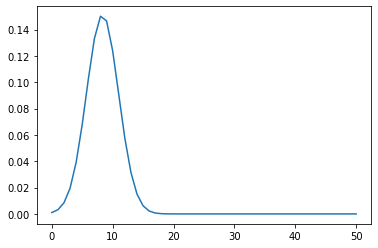

In [53]:
from scipy.stats import norm

n=50
mu = n*p
std=np.sqrt(n*p*(1-p))

x = np.arange(n+1)
y = norm.pdf(x=x, loc=mu, scale=std)

plt.plot(x, y)

区間推定 interval

In [54]:
stats.binom.interval(0.95, n=1000, p=0.6)

(570.0, 630.0)

#  平均の区間推定

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [60]:
df = pd.read_csv('kaggle_income.csv')
df.columns

Index(['id', 'State_Code', 'State_Name', 'State_ab', 'County', 'City', 'Place',
       'Type', 'Primary', 'Zip_Code', 'Area_Code', 'ALand', 'AWater', 'Lat',
       'Lon', 'Mean', 'Median', 'Stdev', 'sum_w'],
      dtype='object')

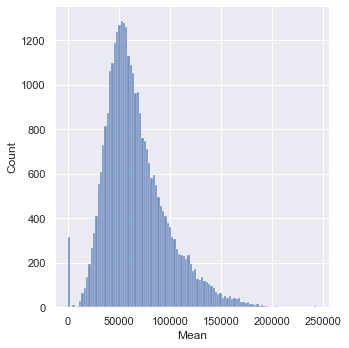

In [63]:
sns.displot(df['Mean'])

In [64]:
np.mean(df['Mean'])

66703.98604193568

1.母集団から無作為抽出した標本を作成する

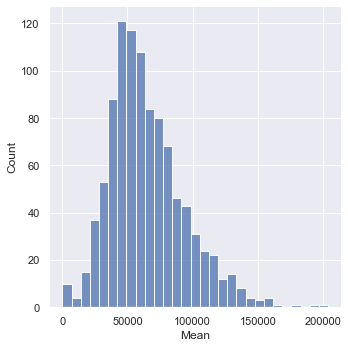

In [66]:
n = 1000
sample_df = df.sample(n=n)
sns.displot(sample_df['Mean'])

2.標本から推定量を計算する

In [67]:
np.mean(sample_df['Mean'])

64749.241

3.信頼区間を決める

4.推定量の標本分布を考える

In [68]:
from scipy import stats
sample_mean=np.mean(sample_df['Mean'])
sample_var = stats.tvar(sample_df['Mean'])
stats.norm.interval(alpha=0.95, loc=sample_mean, scale=np.sqrt(sample_var/n))

(62942.68967294362, 66555.79232705639)

# t分布

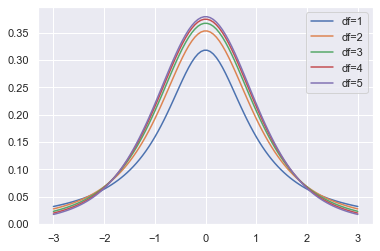

In [69]:
x = np.linspace(-3, 3, 100)
for df in range(1, 6):
    t = stats.t.pdf(x, df)
    plt.plot(x, t, label='df={}'.format(df))
plt.legend()

#### 標準正規分布と比較する

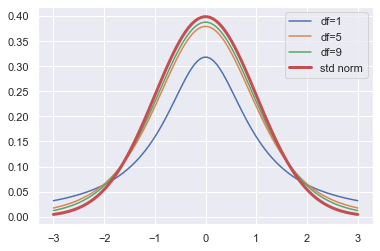

In [71]:
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x, loc=0, scale=1)
for df in range(1, 10, 4):
    t = stats.t.pdf(x, df)
    plt.plot(x, t, label='df={}'.format(df))
plt.plot(x, z, label='std norm', linewidth=3)
plt.legend()

## 95%信頼区間

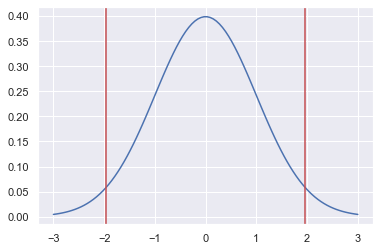

In [73]:
x = np.linspace(-3, 3, 100)
left, right = stats.norm.interval(0.95, loc=0, scale=1)
z = stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, z)
plt.axvline(left, c='r')
plt.axvline(right, c='r')

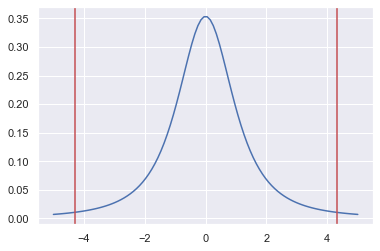

In [74]:
x = np.linspace(-5, 5, 100)
left, right = stats.t.interval(0.95, df=2)
t = stats.t.pdf(x, df=2)
plt.plot(x, t)
plt.axvline(left, c='r')
plt.axvline(right, c='r')

## t分布を使って平均値の区間推定

In [75]:
df = pd.read_csv('kaggle_income.csv')

In [77]:
print('Numpy:{}'.format(np.mean(df['Mean'])))
print('Pandas:{}'.format(df['Mean'].mean()))

Numpy:66703.98604193568
Pandas:66703.98604193568


In [78]:
n = 1000
sample_df = df.sample(n=n)
print(sample_df['Mean'].mean())

67074.242


In [82]:
sample_mean = sample_df['Mean'].mean()
sample_std = sample_df['Mean'].std()
stats.t.interval(0.95, loc=sample_mean, scale=sample_std/np.sqrt(n), df=n-1)

(65219.01897512438, 68929.46502487562)

In [83]:
stats.norm.interval(0.95, loc=sample_mean, scale=sample_std/np.sqrt(n))

(65221.26667227828, 68927.21732772172)